In [1]:
import os
import numpy as np
import pandas as pd
from scipy.optimize import nnls
from matplotlib import pyplot as plt

In [2]:
path=r'C:\Workplace\C#\Test\Test_test\ConsoleApp2\bin\Debug\matrix_all'
# path=r'C:\Workplace\C#\Test\Test_test\ConsoleApp2\bin\Debug\matrix_r'
files=['exact_aa.csv',
 'no_noise_aa.csv',
 'with_noise_aa-6.csv',
 'with_noise_aa-2.csv',
 'with_noise_aa.csv']
labels=['exact','no_noise','with_noise * 10^-6','with_noise * 10^-2','with_noise']

In [3]:
data=pd.read_csv(path+"\\"+files[0])

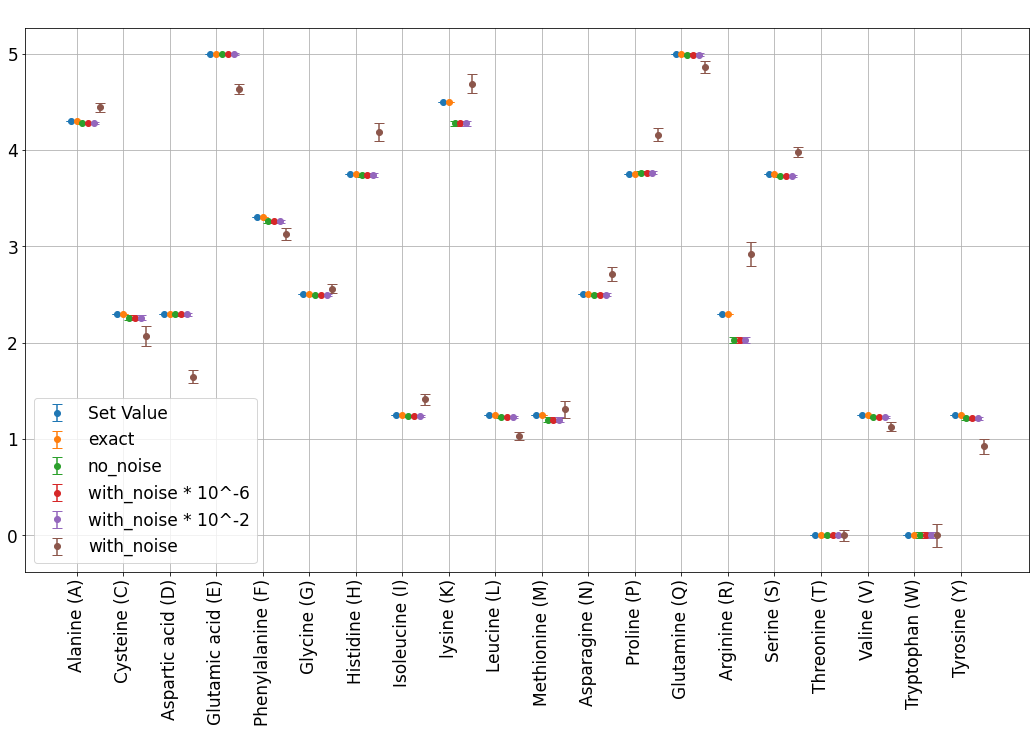

In [4]:

plt.rc('font', size=17) 
plt.rc('figure', figsize=(18,10)) 

plt.title("  ")
plt.errorbar([x+0.5*-1 for x in range(0,80,4)], data['AAsInfo.AA_NEH_tritium'], [0]*20,
                     fmt ='o',ms=6,label="Set Value",capsize=5)
for k in range(len(labels)):
    data=pd.read_csv(path+"\\"+files[k])
    col=data['AAsInfo.AA_NEH_APE']
    col_ci=data['AAsInfo.AA_NEH_APE_ci']
    plt.errorbar([x+0.5*k for x in range(0,80,4)], col, col_ci,
                     fmt ='o',ms=6,label=labels[k],capsize=5)
    

plt.legend(loc='lower left')
plt.xticks(range(0,80,4),data['AAsInfo.AA_name'],rotation=90)
plt.grid()
plt.savefig("simulation_aa_neh_CI.jpeg",dpi=900,bbox_inches='tight')
plt.show()

In [5]:
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
files=[x for x in os.listdir(path) if '_aa' not in x]
files=['no_noise.csv', 'with_noise-6.csv', 'with_noise-2.csv', 'with_noise.csv']
labels=['no_noise','with_noise * 10^-6','with_noise * 10^-2','with_noise']

In [7]:
# data=pd.read_csv(path+"\\"+files[k])

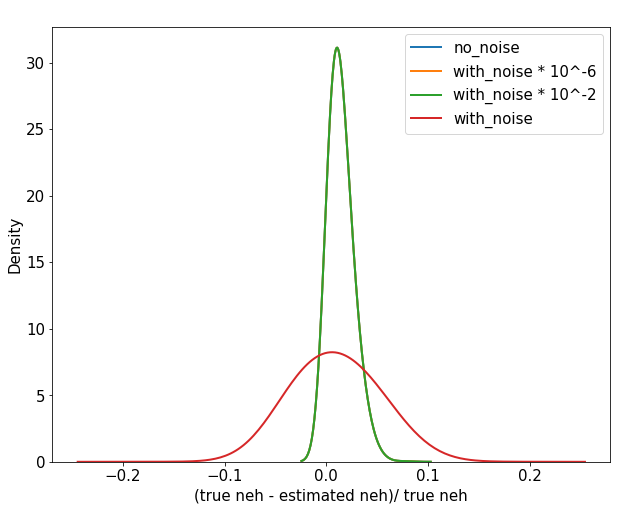

In [8]:
bw=0.75
bins=7000
lw=2
mtd="scott"
plt.rc('font', size=15) 
plt.figure(figsize=(10,8))
plt.title("  ")
for k in range(len(files)):
    data=pd.read_csv(path+"\\"+files[k])
    
    res=list((data['PeptidesPassedNEHfilters.T_NEH'] - data['PeptidesPassedNEHfilters.APE_NEH'])/data['PeptidesPassedNEHfilters.T_NEH'])


    sns.distplot(res, 
             hist = False,bins=bins, kde = True,
                 hist_kws={'alpha':0.3},
                     kde_kws = {'shade': False, 'linewidth': lw,'bw':bw,'bw_method':mtd} ,
             label=labels[k])
plt.legend()
plt.xlabel("(true neh - estimated neh)/ true neh")
plt.savefig("neh_density.jpeg",dpi=900,bbox_inches='tight')